<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas


In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2024-12-09 02:12:38--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  51.8MB/s    in 2.9s    

2024-12-09 02:12:41 (51.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt


#### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


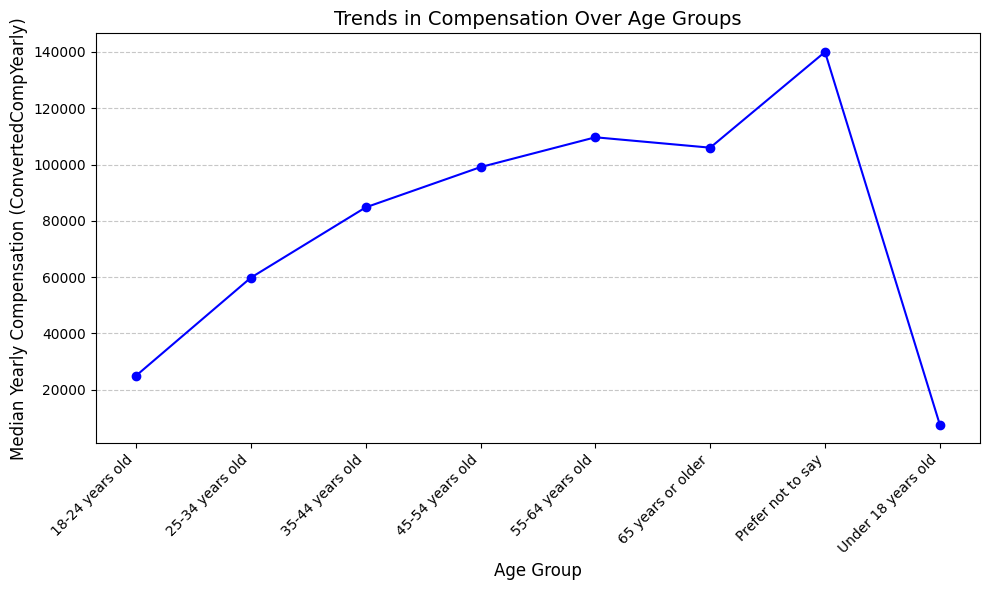

In [7]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded

# Step 1: Map Age into numeric values for plotting
age_mapping = {
    'Under 18 years old': 17, 
    '18-24 years old': 21, 
    '25-34 years old': 30, 
    '35-44 years old': 40, 
    '45-54 years old': 50, 
    '55-64 years old': 60, 
    '65 years and older': 70
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Step 2: Group by Age and compute median of ConvertedCompYearly
df_grouped = df.groupby('Age').agg({'ConvertedCompYearly': 'median'}).reset_index()

# Step 3: Plot the Line Chart for Median Compensation by Age Group
plt.figure(figsize=(10, 6))

# Plotting the median compensation as a line chart
plt.plot(df_grouped['Age'], df_grouped['ConvertedCompYearly'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Yearly Compensation (ConvertedCompYearly)', fontsize=12)
plt.title('Trends in Compensation Over Age Groups', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Display the grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


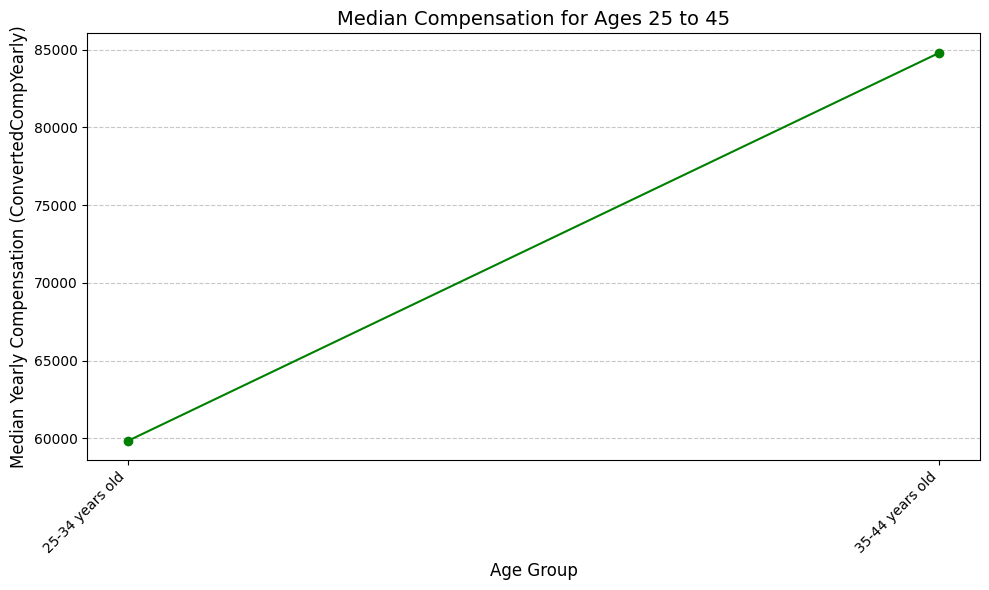

In [8]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded

# Step 1: Map Age into numeric values for plotting (if not done yet)
age_mapping = {
    'Under 18 years old': 17, 
    '18-24 years old': 21, 
    '25-34 years old': 30, 
    '35-44 years old': 40, 
    '45-54 years old': 50, 
    '55-64 years old': 60, 
    '65 years and older': 70
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Step 2: Filter the data for respondents aged 25 to 45
df_filtered = df[df['Age'].isin(['25-34 years old', '35-44 years old'])]

# Step 3: Group by Age and compute median ConvertedCompYearly
df_grouped = df_filtered.groupby('Age').agg({'ConvertedCompYearly': 'median'}).reset_index()

# Step 4: Plot the Line Chart for Median Compensation (ConvertedCompYearly) for Ages 25 to 45
plt.figure(figsize=(10, 6))

# Plotting the median compensation as a line chart
plt.plot(df_grouped['Age'], df_grouped['ConvertedCompYearly'], marker='o', linestyle='-', color='g')

# Add labels and title
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Yearly Compensation (ConvertedCompYearly)', fontsize=12)
plt.title('Median Compensation for Ages 25 to 45', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Display the grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


/tmp/ipykernel_824/1839455410.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby('ExperienceLevel')['JobSatPoints_6'].median().reset_index()


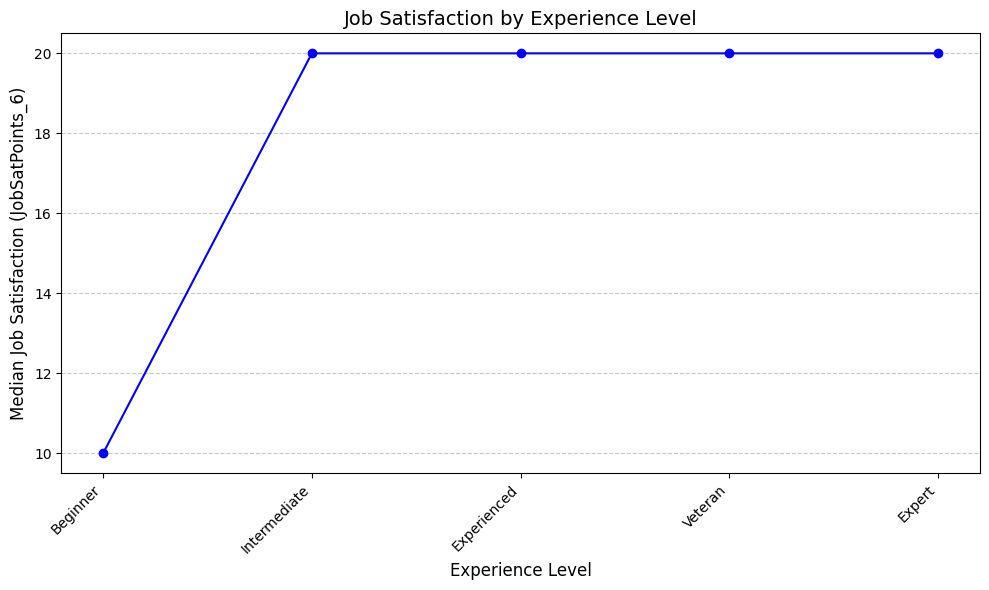

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded

# Step 1: Clean 'YearsCodePro' column by filling NaN values with a default value (e.g., 0 for beginners)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')  # Convert to numeric, forcing errors to NaN
df['YearsCodePro'] = df['YearsCodePro'].fillna(0)  # Replace NaN with 0 (you can adjust this if needed)

# Step 2: Categorize Experience Level based on YearsCodePro
bins = [0, 2, 5, 10, 20, 50]  # Define experience brackets (years)
labels = ['Beginner', 'Intermediate', 'Experienced', 'Veteran', 'Expert']  # Experience level labels

# Using 'YearsCodePro' for experience level categorization
df['ExperienceLevel'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Step 3: Group by ExperienceLevel and calculate the median JobSatPoints_6 for each level
df_grouped = df.groupby('ExperienceLevel')['JobSatPoints_6'].median().reset_index()

# Step 4: Plot the Line Chart
plt.figure(figsize=(10, 6))

# Plotting the JobSatPoints_6 as a line chart
plt.plot(df_grouped['ExperienceLevel'], df_grouped['JobSatPoints_6'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Median Job Satisfaction (JobSatPoints_6)', fontsize=12)
plt.title('Job Satisfaction by Experience Level', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Display the grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


/tmp/ipykernel_824/1010240501.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby('ExperienceLevel')['ConvertedCompYearly'].median().reset_index()


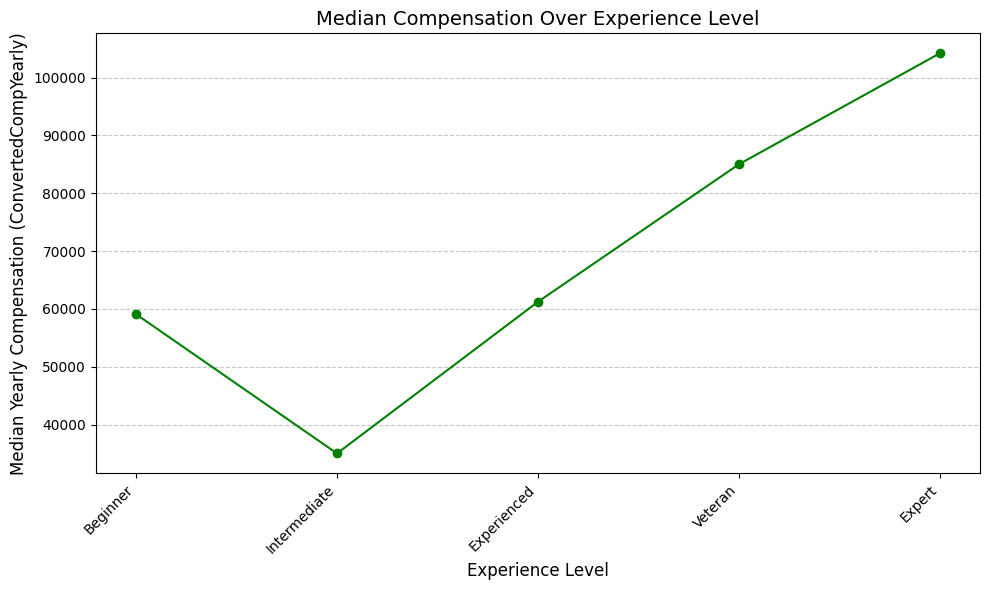

In [11]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded

# Step 1: Clean 'WorkExp' column (or use 'YearsCodePro' if needed) by handling NaN or non-numeric values
df['WorkExp'] = pd.to_numeric(df['WorkExp'], errors='coerce')  # Convert to numeric, force errors to NaN
df['WorkExp'] = df['WorkExp'].fillna(0)  # Fill NaN with 0 (you can adjust this if needed)

# Step 2: Define Experience Levels for 'WorkExp' (or use 'YearsCodePro' instead if preferred)
bins = [0, 2, 5, 10, 20, 50]  # Define experience level brackets (years)
labels = ['Beginner', 'Intermediate', 'Experienced', 'Veteran', 'Expert']  # Experience level labels

# Categorize into Experience Levels
df['ExperienceLevel'] = pd.cut(df['WorkExp'], bins=bins, labels=labels, right=False)

# Step 3: Group by ExperienceLevel and calculate the median ConvertedCompYearly for each level
df_grouped = df.groupby('ExperienceLevel')['ConvertedCompYearly'].median().reset_index()

# Step 4: Plot the Line Chart
plt.figure(figsize=(10, 6))

# Plotting the median ConvertedCompYearly against Experience Level
plt.plot(df_grouped['ExperienceLevel'], df_grouped['ConvertedCompYearly'], marker='o', linestyle='-', color='g')

# Add labels and title
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Median Yearly Compensation (ConvertedCompYearly)', fontsize=12)
plt.title('Median Compensation Over Experience Level', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Display the grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


/tmp/ipykernel_824/3634800743.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby('ExperienceLevel')['JobSatPoints_6'].median().reset_index()


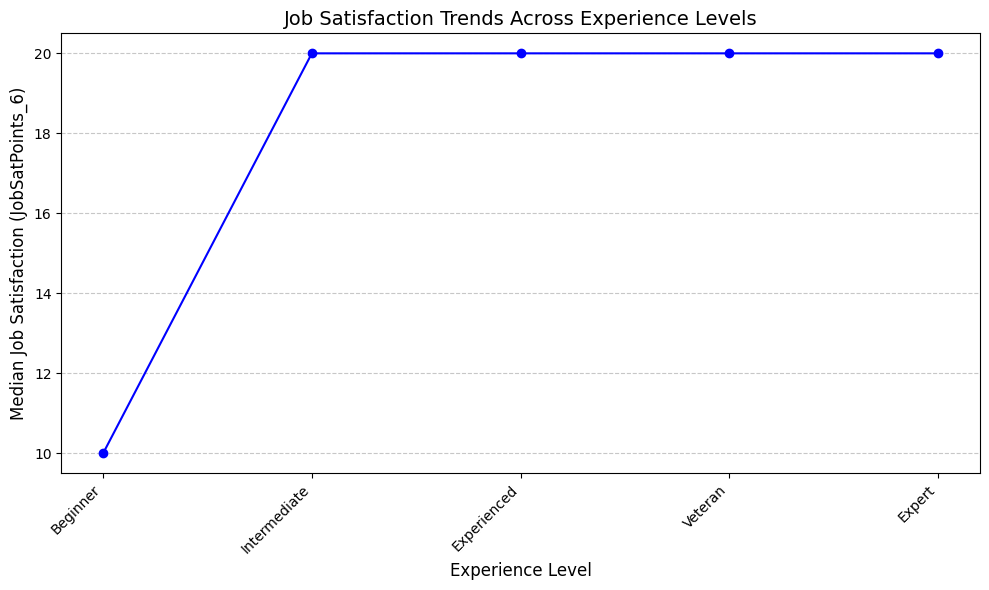

In [12]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded

# Step 1: Clean the 'WorkExp' (or 'YearsCodePro') column by handling NaN or non-numeric values
df['WorkExp'] = pd.to_numeric(df['WorkExp'], errors='coerce')  # Convert to numeric, force errors to NaN
df['WorkExp'] = df['WorkExp'].fillna(0)  # Fill NaN with 0 (you can adjust this if needed)

# Step 2: Define Experience Levels for 'WorkExp' (or 'YearsCodePro' if preferred)
bins = [0, 2, 5, 10, 20, 50]  # Define experience level brackets (years)
labels = ['Beginner', 'Intermediate', 'Experienced', 'Veteran', 'Expert']  # Experience level labels

# Categorize into Experience Levels
df['ExperienceLevel'] = pd.cut(df['WorkExp'], bins=bins, labels=labels, right=False)

# Step 3: Group by ExperienceLevel and calculate the median JobSatPoints_6 for each level
df_grouped = df.groupby('ExperienceLevel')['JobSatPoints_6'].median().reset_index()

# Step 4: Plot the Line Chart
plt.figure(figsize=(10, 6))

# Plotting the median JobSatPoints_6 against Experience Level
plt.plot(df_grouped['ExperienceLevel'], df_grouped['JobSatPoints_6'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Median Job Satisfaction (JobSatPoints_6)', fontsize=12)
plt.title('Job Satisfaction Trends Across Experience Levels', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Display the grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
